# **TUGAS 1 - SCRAPING & EDA**

Pengumpulan data berdasarkan scraping dari situs Open Food Facts

# **SCRAPING**

In [ ]:
!pip install pandas

import requests
import pandas as pd
import time


[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
categories = [
    "soft-drinks",
    "fruit-juices",
    "energy-drinks",
    "plant-milks",
    "teas",
    "coffees",
    "iced-teas",
    "milk-substitutes",
    "flavored-waters",
    "fermented-drinks",
    "non-dairy-beverages",
    "smoothies"
]


columns = [
    "Kategori", "Nama_minuman", "Nutri_Score", "Energy (Per 100 ml)", "Fat (Per 100 ml)",
    "Saturated fat (Per 100 ml)", "Carbohydrates (Per 100 ml)", "Sugars (Per 100 ml)",
    "Fiber (Per 100 ml)", "Proteins (Per 100 ml)", "Salt (Per 100 ml)"
]

all_rows = []

for category in categories:
    print(f"Ambil data kategori: {category}")
    url = "https://world.openfoodfacts.org/cgi/search.pl"
    params = {
        "action": "process",
        "tagtype_0": "categories",
        "tag_contains_0": "contains",
        "tag_0": category,
        "page_size": 1000,
        "json": 1,
    }

    try:
        response = requests.get(url, params=params)
        data = response.json()

        for product in data.get("products", []):
            nutriments = product.get("nutriments", {})

            row = [
                category,
                product.get("product_name", "").strip(),
                product.get("nutriscore_grade", "").lower(),
                nutriments.get("energy_100g", ""),
                nutriments.get("fat_100g", ""),
                nutriments.get("saturated-fat_100g", ""),
                nutriments.get("carbohydrates_100g", ""),
                nutriments.get("sugars_100g", ""),
                nutriments.get("fiber_100g", ""),
                nutriments.get("proteins_100g", ""),
                nutriments.get("salt_100g", ""),
            ]

            nutri_score = row[2]
            if nutri_score not in ['a', 'b', 'c', 'd', 'e']:
                continue

            nutrisi_values = row[3:]
            if all(str(value).strip() == "" for value in nutrisi_values):
                continue

            all_rows.append(row)

        time.sleep(1)
    except Exception as e:
        print(f"Error kategori {category}: {e}")

df = pd.DataFrame(all_rows, columns=columns)
df.to_csv("minuman.csv", index=False, encoding="utf-8-sig")

print(f"Berhasil disimpan: {len(df)} baris")

Ambil data kategori: soft-drinks
Error kategori soft-drinks: Expecting value: line 1 column 1 (char 0)
Ambil data kategori: fruit-juices
Ambil data kategori: energy-drinks
Ambil data kategori: plant-milks
Ambil data kategori: teas
Ambil data kategori: coffees
Ambil data kategori: iced-teas
Ambil data kategori: milk-substitutes
Ambil data kategori: flavored-waters
Ambil data kategori: fermented-drinks
Ambil data kategori: non-dairy-beverages
Error kategori non-dairy-beverages: Expecting value: line 1 column 1 (char 0)
Ambil data kategori: smoothies
Berhasil disimpan: 809 baris


In [ ]:
df.to_csv("minuman.csv", index=False, encoding="utf-8-sig")

# **EXPLORATORY DATA ANALYSIS (EDA)**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

df = pd.read_csv('minuman.csv')

In [ ]:
df.head()

,Kategori,Nama_minuman,Nutri_Score,Energy (Per 100 ml),Fat (Per 100 ml),Saturated fat (Per 100 ml),Carbohydrates (Per 100 ml),Sugars (Per 100 ml),Fiber (Per 100 ml),Proteins (Per 100 ml),Salt (Per 100 ml)
0,fruit-juices,Cappy pulpy,e,155.0,0.0,0.0,9.0,7.0,NaN,0.0,0.050000
1,fruit-juices,PRESSup ORANGE 1L,c,226.0,0.1,0.0,13.0,5.5,0.1,0.4,0.000003
2,fruit-juices,Press up,c,226.0,0.1,0.0,13.0,5.5,0.1,0.4,0.002500
3,fruit-juices,Shot de gingembre bio,c,163.0,0.5,0.1,7.9,7.6,NaN,0.5,0.010000
4,fruit-juices,Jutos,d,66.8,0.0,0.0,10.0,8.0,0.0,0.0,0.050000


In [ ]:
print(f"Dataset ini memiliki {df.shape[0]} baris dan {df.shape[1]} kolom.")

Dataset ini memiliki 809 baris dan 11 kolom.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 809 entries, 0 to 808
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Kategori                    809 non-null    object 
 1   Nama_minuman                796 non-null    object 
 2   Nutri_Score                 809 non-null    object 
 3   Energy (Per 100 ml)         809 non-null    float64
 4   Fat (Per 100 ml)            809 non-null    float64
 5   Saturated fat (Per 100 ml)  775 non-null    float64
 6   Carbohydrates (Per 100 ml)  808 non-null    float64
 7   Sugars (Per 100 ml)         802 non-null    float64
 8   Fiber (Per 100 ml)          517 non-null    float64
 9   Proteins (Per 100 ml)       809 non-null    float64
 10  Salt (Per 100 ml)           809 non-null    float64
dtypes: float64(8), object(3)
memory usage: 69.7+ KB


In [ ]:
# Daftar kolom yang seharusnya numerik
numeric_cols = [
    "Energy (Per 100 ml)", "Fat (Per 100 ml)", "Saturated fat (Per 100 ml)",
    "Carbohydrates (Per 100 ml)", "Sugars (Per 100 ml)", "Fiber (Per 100 ml)",
    "Proteins (Per 100 ml)", "Salt (Per 100 ml)"
]

# konversi tipe data untuk setiap kolom
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

print("Tipe data setelah konversi:")
df.info()

Tipe data setelah konversi:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 809 entries, 0 to 808
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Kategori                    809 non-null    object 
 1   Nama_minuman                796 non-null    object 
 2   Nutri_Score                 809 non-null    object 
 3   Energy (Per 100 ml)         809 non-null    float64
 4   Fat (Per 100 ml)            809 non-null    float64
 5   Saturated fat (Per 100 ml)  775 non-null    float64
 6   Carbohydrates (Per 100 ml)  808 non-null    float64
 7   Sugars (Per 100 ml)         802 non-null    float64
 8   Fiber (Per 100 ml)          517 non-null    float64
 9   Proteins (Per 100 ml)       809 non-null    float64
 10  Salt (Per 100 ml)           809 non-null    float64
dtypes: float64(8), object(3)
memory usage: 69.7+ KB


In [ ]:
print("\nJumlah nilai yang hilang per kolom:")
df.isnull().sum()


Jumlah nilai yang hilang per kolom:


Kategori                        0
Nama_minuman                   13
Nutri_Score                     0
Energy (Per 100 ml)             0
Fat (Per 100 ml)                0
Saturated fat (Per 100 ml)     34
Carbohydrates (Per 100 ml)      1
Sugars (Per 100 ml)             7
Fiber (Per 100 ml)            292
Proteins (Per 100 ml)           0
Salt (Per 100 ml)               0
dtype: int64

In [ ]:
df_cleaned = df.dropna()

print(f"Jumlah baris sebelum : {len(df)}")
print(f"Jumlah baris setelah : {len(df_cleaned)}")
print(f"Total baris yang dibuang: {len(df) - len(df_cleaned)}")

Jumlah baris sebelum : 809
Jumlah baris setelah : 496
Total baris yang dibuang: 313


In [ ]:
jumlah_duplikat = df.duplicated().sum()
print(f"Ditemukan {jumlah_duplikat} baris data duplikat.")

Ditemukan 2 baris data duplikat.


In [ ]:
if jumlah_duplikat > 0:
    print(f"Jumlah baris sebelum menghapus duplikat: {df.shape[0]}")

    df = df.drop_duplicates(keep='first').reset_index(drop=True)

    print(f"Jumlah baris setelah menghapus duplikat: {df.shape[0]}")
else:
    print("Tidak ada data duplikat untuk dihapus.")

Jumlah baris sebelum menghapus duplikat: 809
Jumlah baris setelah menghapus duplikat: 807


In [ ]:
# ringkasan statistik untuk kolom numerik
df_cleaned[numeric_cols].describe()

,Energy (Per 100 ml),Fat (Per 100 ml),Saturated fat (Per 100 ml),Carbohydrates (Per 100 ml),Sugars (Per 100 ml),Fiber (Per 100 ml),Proteins (Per 100 ml),Salt (Per 100 ml)
count,496.000000,496.000000,496.000000,496.000000,496.000000,4.960000e+02,496.000000,496.000000
mean,193.783589,1.652780,0.961193,6.848065,5.065941,1.232105e+10,0.920933,0.165326
std,247.790135,3.986107,3.413402,10.096008,6.281625,2.744029e+11,1.573685,1.289830
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,79.000000,0.000000,0.000000,1.600000,0.500000,0.000000e+00,0.000000,0.000237
50%,167.000000,0.500000,0.100000,5.300000,3.600000,3.165000e-01,0.500000,0.040000
75%,217.250000,1.600000,0.300000,10.000000,8.825000,7.000000e-01,1.000000,0.100000
max,2370.000000,32.300000,24.600000,127.000000,72.000000,6.111242e+12,17.400000,20.100000


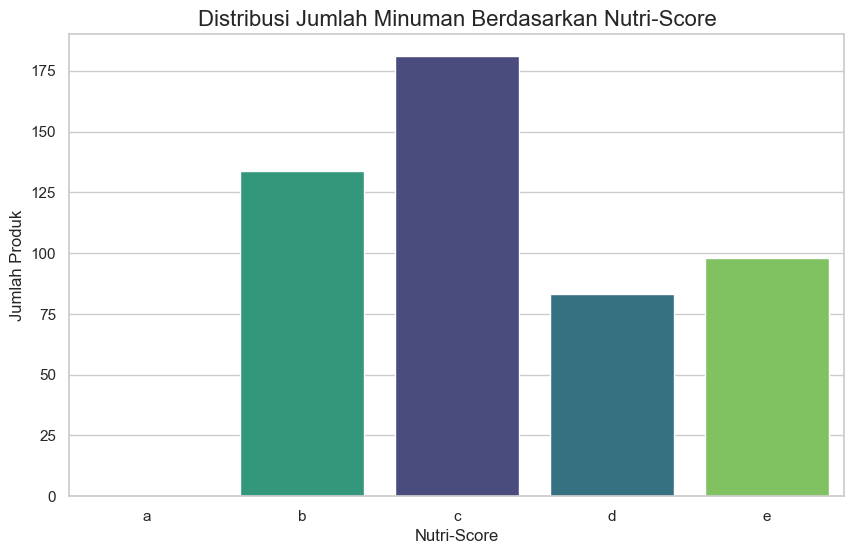

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_cleaned, x='Nutri_Score', order=['a', 'b', 'c', 'd', 'e'], palette='viridis', hue='Nutri_Score', legend=False)
plt.title('Distribusi Jumlah Minuman Berdasarkan Nutri-Score', fontsize=16)
plt.xlabel('Nutri-Score', fontsize=12)
plt.ylabel('Jumlah Produk', fontsize=12)
plt.show()

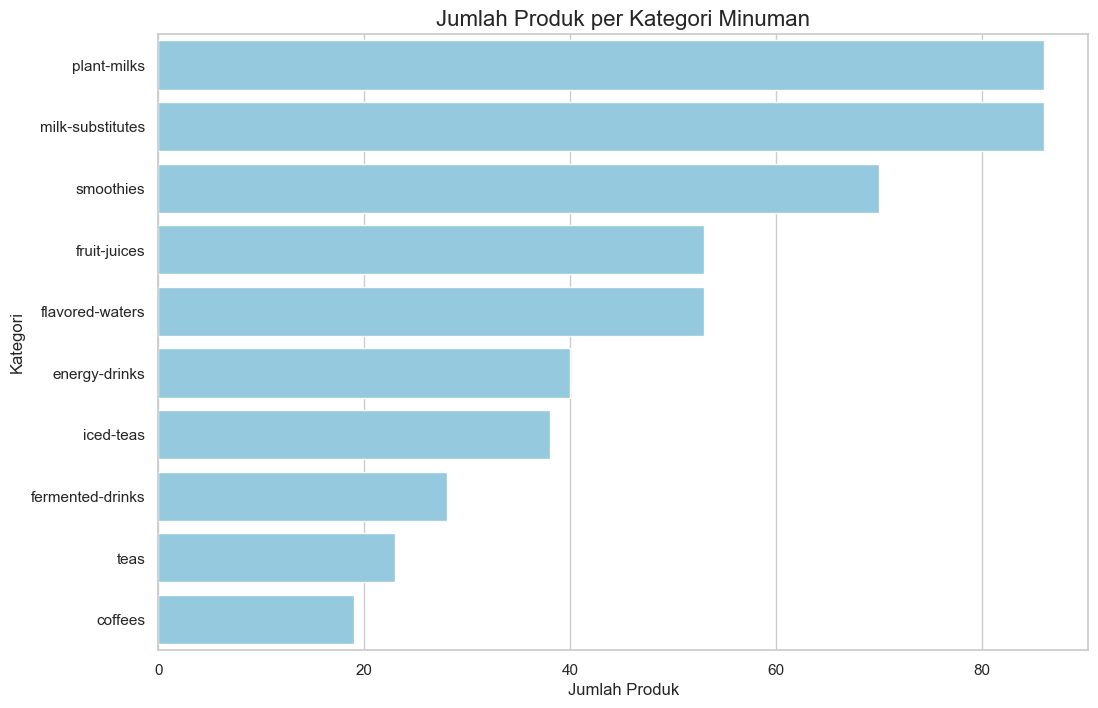

In [ ]:
plt.figure(figsize=(12, 8))

sns.countplot(data=df_cleaned, y='Kategori', order=df_cleaned['Kategori'].value_counts().index, color='skyblue')

plt.title('Jumlah Produk per Kategori Minuman', fontsize=16)
plt.xlabel('Jumlah Produk', fontsize=12)
plt.ylabel('Kategori', fontsize=12)
plt.show()

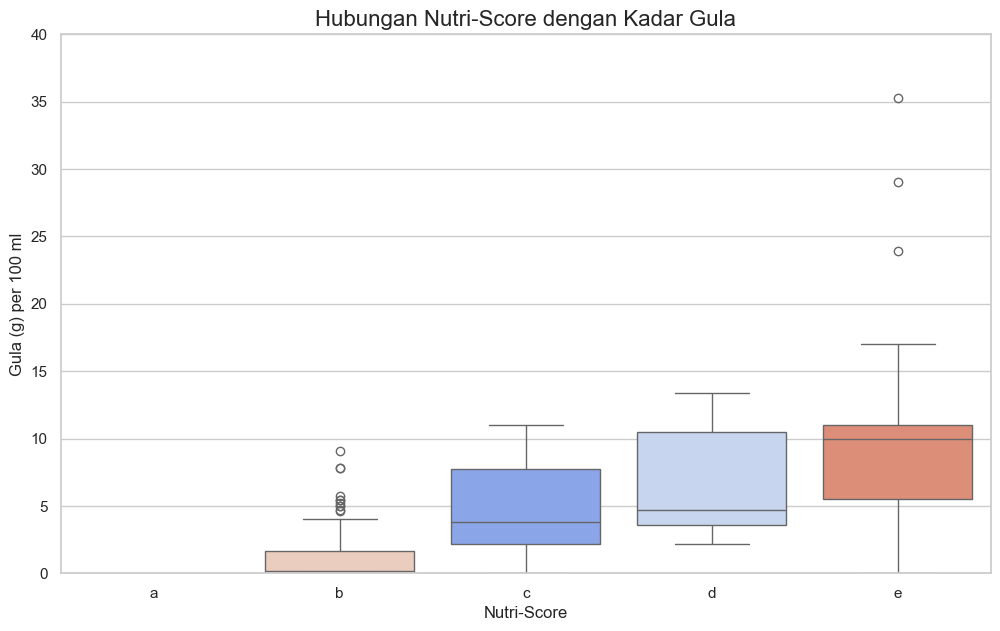

In [ ]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=df_cleaned, x='Nutri_Score', y='Sugars (Per 100 ml)', order=['a', 'b', 'c', 'd', 'e'], palette='coolwarm', hue='Nutri_Score', legend=False)
plt.title('Hubungan Nutri-Score dengan Kadar Gula', fontsize=16)
plt.xlabel('Nutri-Score', fontsize=12)
plt.ylabel('Gula (g) per 100 ml', fontsize=12)
plt.ylim(0, 40) # Batasi sumbu y agar visualisasi lebih jelas, bisa disesuaikan
plt.show()

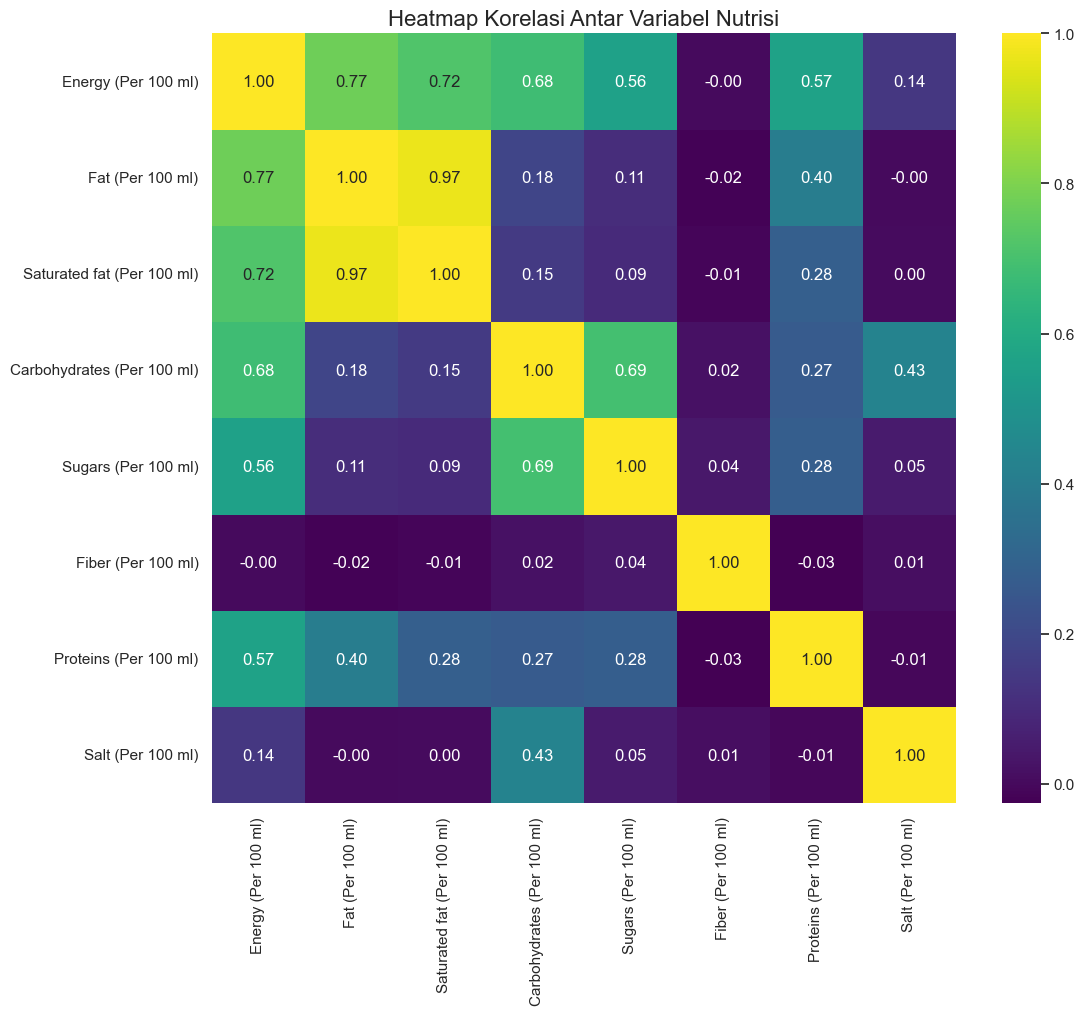

In [ ]:
# Hitung matriks korelasi
correlation_matrix = df_cleaned[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title('Heatmap Korelasi Antar Variabel Nutrisi', fontsize=16)
plt.show()